## Student Performance 

#### Life cycle of machine learning
* understanding the problem statement
* Data collection
* Data checks to perform
* EDA 
* Data pre processing
* Model Training 
* Choose best model 

## 1) Problem Statement
About Dataset
Context
Marks secured by the students

Content
This data set consists of the marks secured by the students in various subjects.

Acknowledgements
http://roycekimmons.com/tools/generated_data/exams

Inspiration
To understand the influence of the parents background, test preparation etc on students performance

## Data collection 

* the source data : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977


In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df= pd.read_csv('StudentsPerformance.csv')

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# check missin values 
df.isna().sum()

# there are not there missing values


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [11]:
# check duplicates
df[df.duplicated()]

# ther are no duplicates values in the dataset


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [13]:
# check the data typing 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [16]:
for col in df.select_dtypes('object').columns:
    print(f"the column {col}")
    print(df[col].unique())
    print("-----------------")

the column gender
['female' 'male']
-----------------
the column race/ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
-----------------
the column parental level of education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
-----------------
the column lunch
['standard' 'free/reduced']
-----------------
the column test preparation course
['none' 'completed']
-----------------


In [17]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [19]:
df.shape

(1000, 8)

In [22]:
cat_col = df.select_dtypes('object').columns
num_col = df.select_dtypes('number').columns

print(f"{cat_col} and it's num is {len(cat_col)}")
print(f"{num_col} and it's num is {len(num_col)}")


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object') and it's num is 5
Index(['math score', 'reading score', 'writing score'], dtype='object') and it's num is 3


### Adding columns for "Totla Score" and "Average"

In [23]:
df['total_score']=df['math score']+ df['reading score'] + df['writing score']
df['average'] = df['total_score']/3 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [28]:
reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()

print(f"the num of student with the full marek in reading is {reading_full}")
print(f"the num of student with the full marek in writing is {writing_full}")
print(f"the num of student with the full marek in math is {math_full}")



the num of student with the full marek in reading is 17
the num of student with the full marek in writing is 14
the num of student with the full marek in math is 7


In [29]:
reading_full = df[df['reading score']<20]['average'].count()
writing_full = df[df['writing score']<20]['average'].count()
math_full = df[df['math score']<20]['average'].count()

print(f"the num of student with less than 20 mark in reading is {reading_full}")
print(f"the num of student with less than 20 mark in writing is {writing_full}")
print(f"the num of student with less than 20 mark in math is {math_full}")


the num of student with less than 20 mark in reading is 1
the num of student with less than 20 mark in writing is 3
the num of student with less than 20 mark in math is 4


## Histogram & KDE

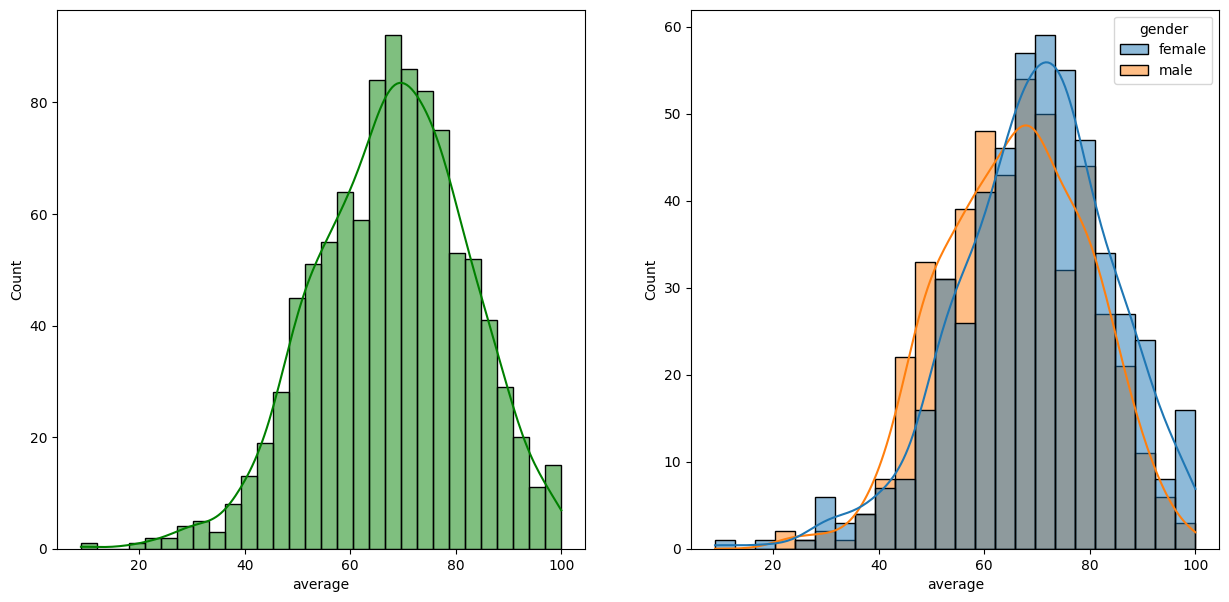

In [31]:
fig , axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df , x='average' , bins=30 , kde=True , color='g')
plt.subplot(122)
sns.histplot(data=df , x = 'average' , kde=True , hue = 'gender')

plt.show()


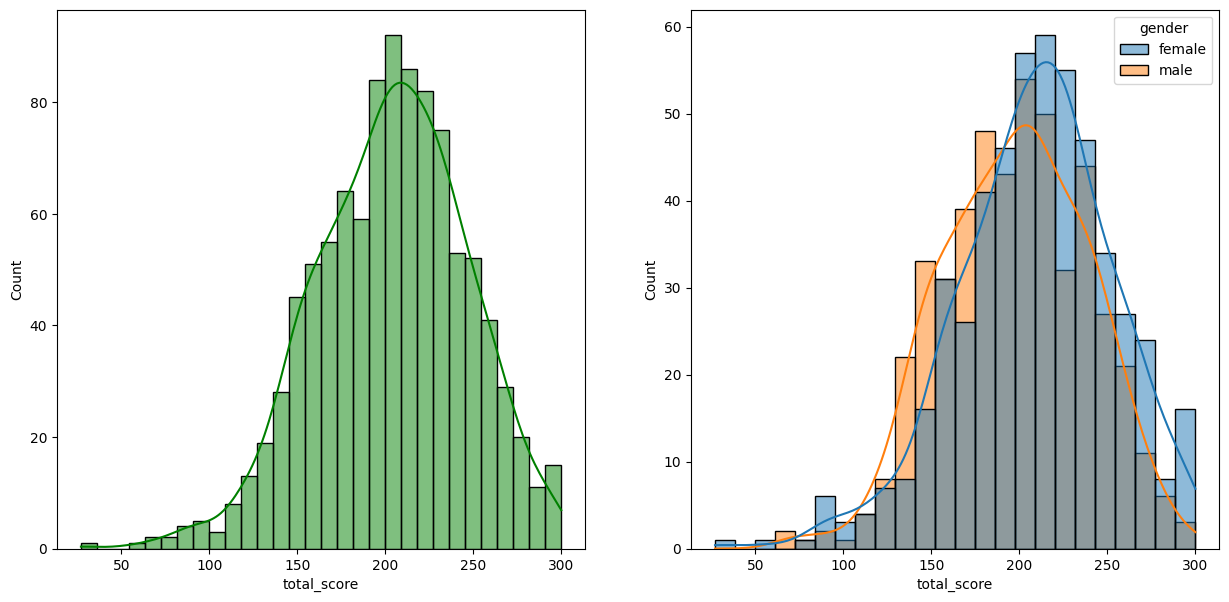

In [32]:
fig , axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df , x='total_score' , bins=30 , kde=True , color='g')
plt.subplot(122)
sns.histplot(data=df , x = 'total_score' , kde=True , hue = 'gender')

plt.show()


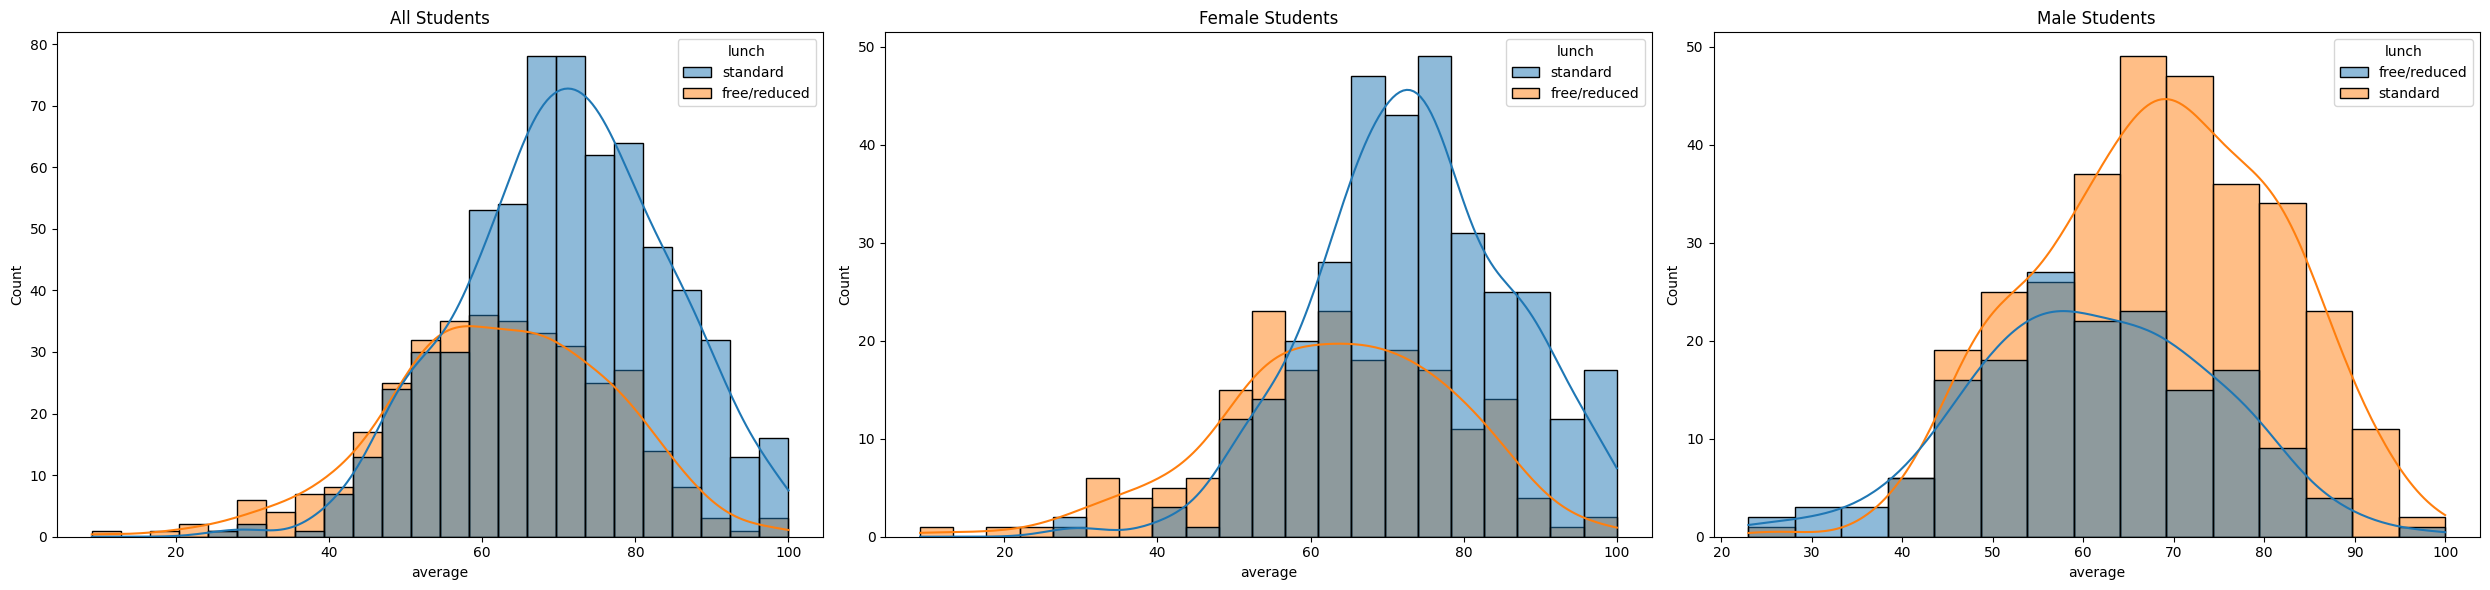

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6))

sns.histplot(data=df, x='average', kde=True, hue='lunch', ax=axs[0])
axs[0].set_title('All Students')

sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch', ax=axs[1])
axs[1].set_title('Female Students')

sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch', ax=axs[2])
axs[2].set_title('Male Students')

plt.tight_layout()
plt.show()

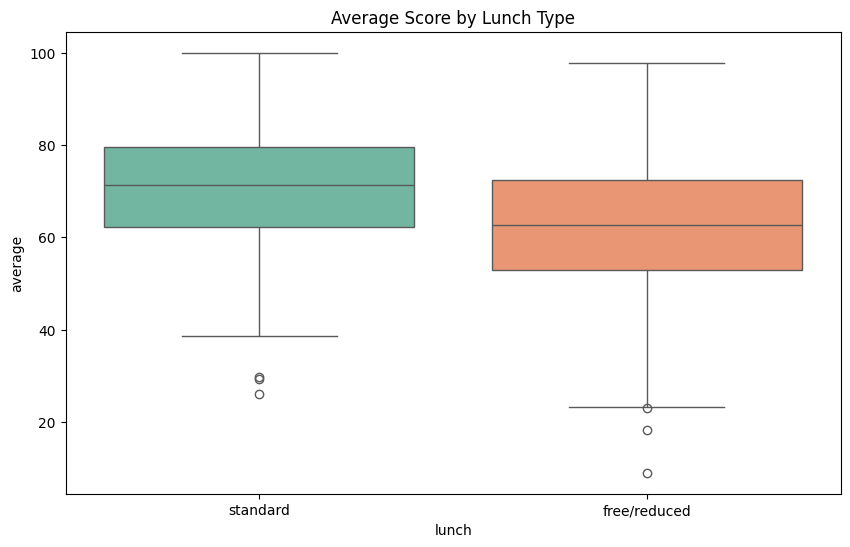

In [37]:
# some insights from the above graph
# 1. The average score of students who receive standard lunch is higher than those who receive free/re
# duced lunch
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='lunch', y='average', palette='Set2')
plt.title('Average Score by Lunch Type')
plt.show()

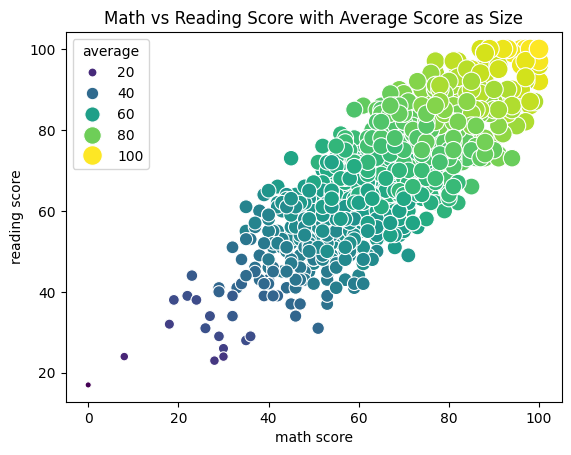

In [38]:
sns.scatterplot(data=df, x='math score', y='reading score', hue='average', palette='viridis', size='average', sizes=(20, 200))
plt.title('Math vs Reading Score with Average Score as Size')   
plt.show()


In [42]:
df[num_col].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

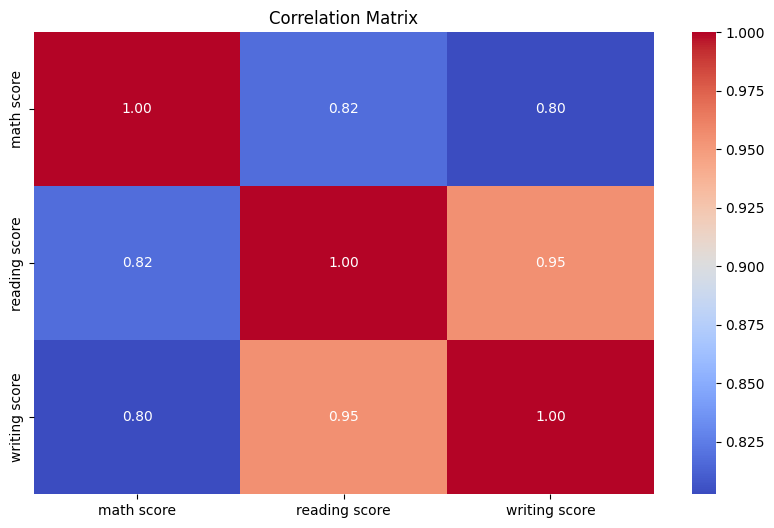

In [43]:
# heatmap for the correlation matrix 
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_col].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix') 

In [45]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


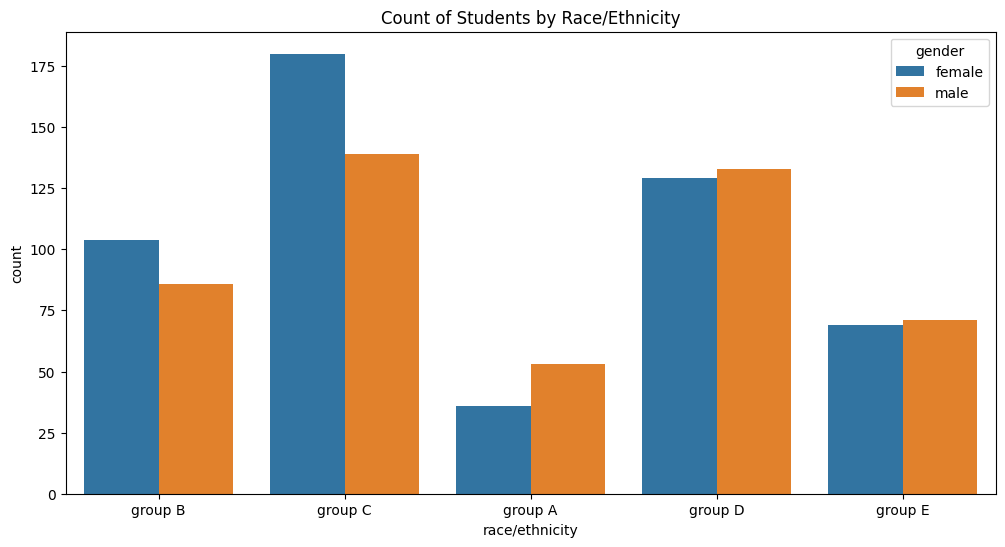

In [47]:
# insight for the target (race/ethnicity)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='race/ethnicity' , hue= 'gender')
plt.title('Count of Students by Race/Ethnicity')
plt.show()

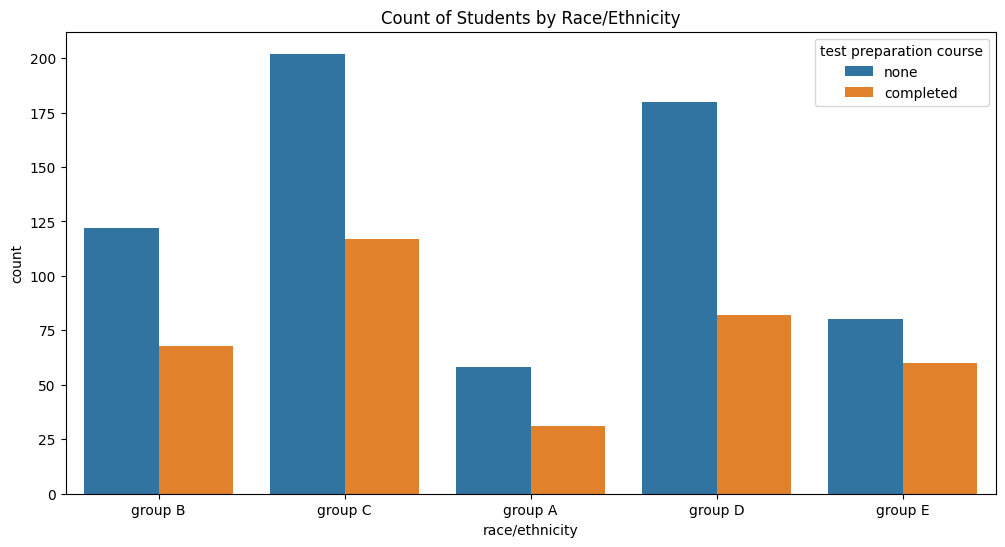

In [49]:
# insight for the target (race/ethnicity)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='race/ethnicity' , hue= 'test preparation course')
plt.title('Count of Students by Race/Ethnicity')
plt.show()

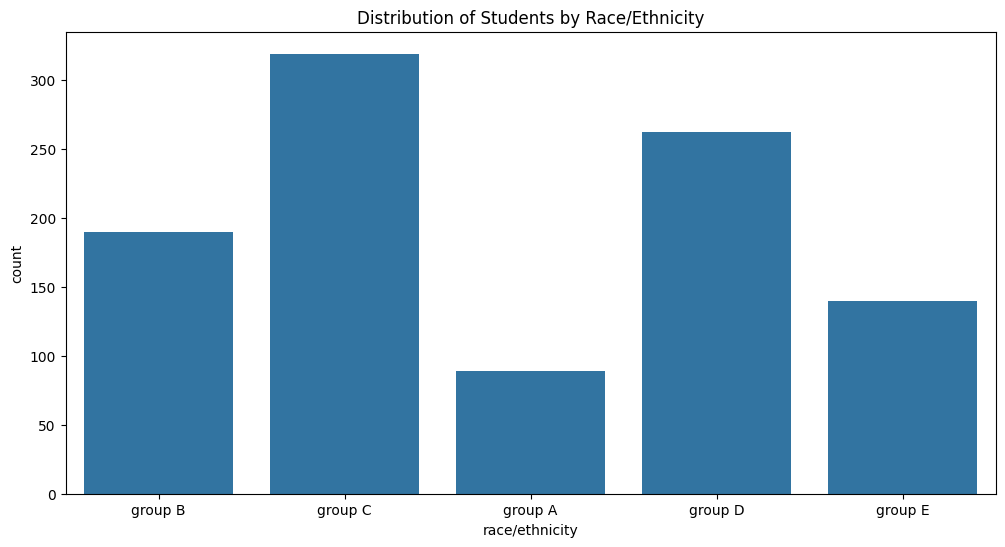

In [53]:
# the relation between all features and the target (race/ethnicity)
plt.figure(figsize=(12, 6))
sns.countplot(x='race/ethnicity', data=df)
plt.title('Distribution of Students by Race/Ethnicity')
plt.show()

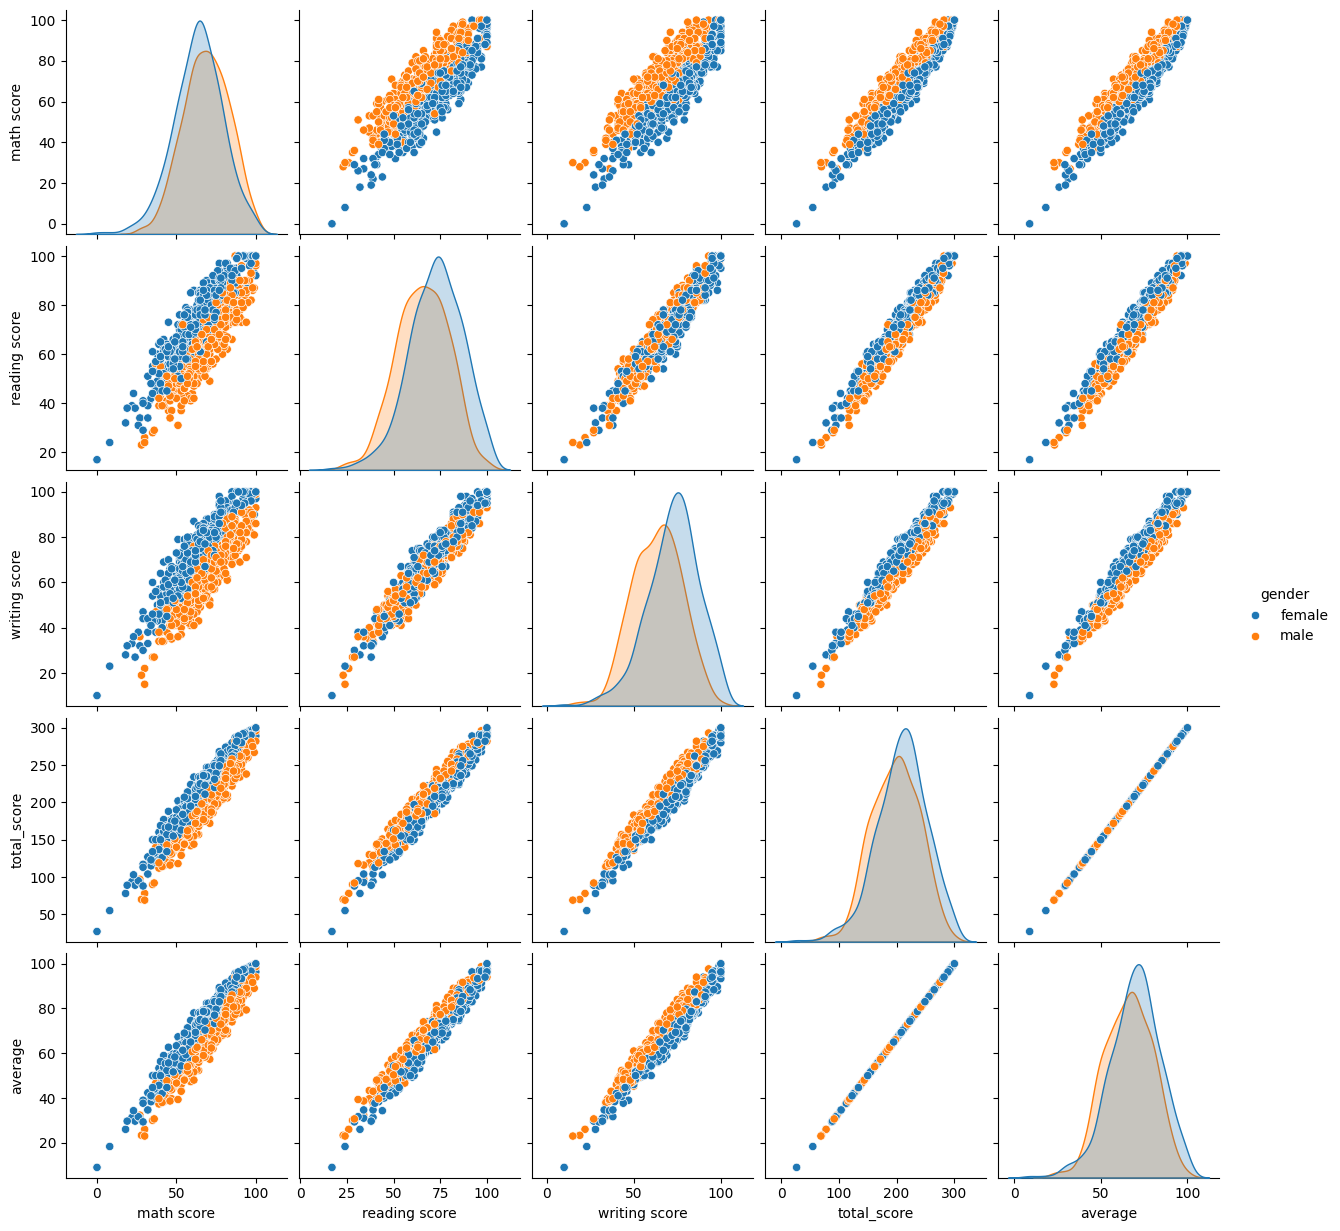

In [54]:
sns.pairplot(df, hue='gender')
plt.show()

## insights

* from the above plot it is clear that all the scores increase linearly wiht each other 

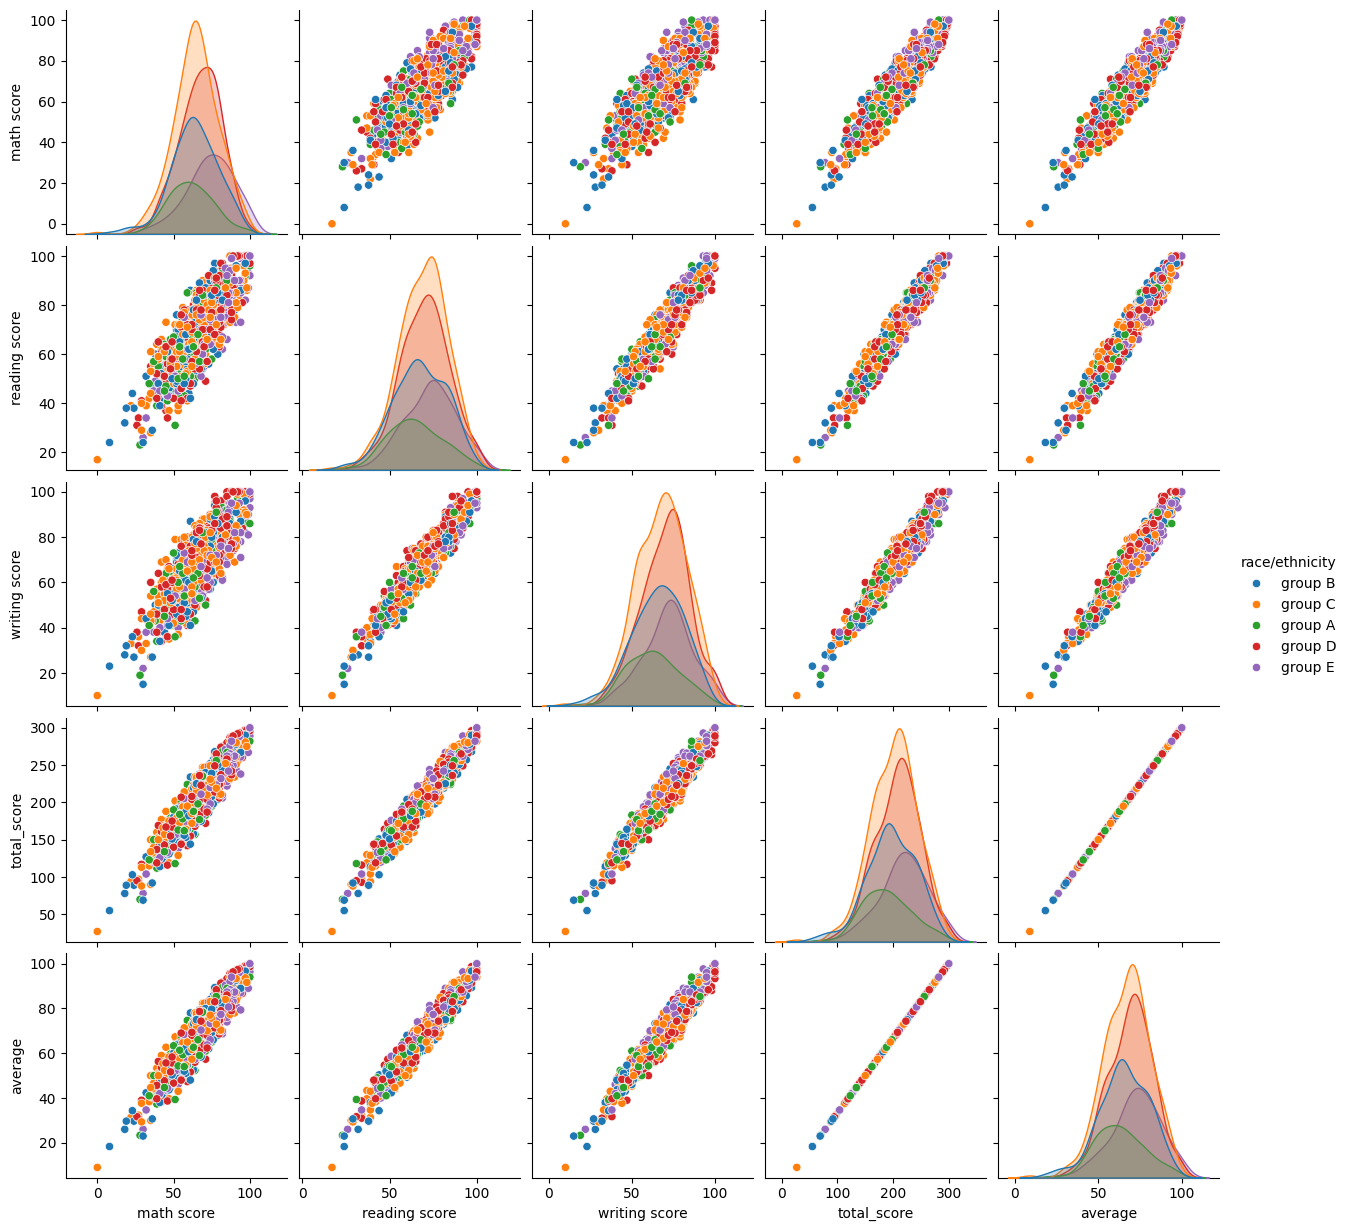

In [55]:
sns.pairplot(df, hue='race/ethnicity')
plt.show()